# 1°) Description Mathématique et Pratique : 

## 1.1°) Comment fonctionne l'algorithme RANSAC ?

Plusieurs utilisations possibles. En partant du plus simple...

#### 1.1.1°) Un Algorithme robuste aux Outliers

La procédure RANSAC est à l'opposé de celle des techniques de lissage conventionnelles : plutôt que d'utiliser autant de données que possible pour obtenir une solution initiale puis tenter d'éliminer les points de données invalides, RANSAC utilise un ensemble de données initial aussi petit que possible et agrandit cet ensemble avec des données cohérentes lorsque cela est possible. Par exemple, étant donné la tâche d'ajuster un arc de cercle à un ensemble de points bidimensionnels, l'approche RANSAC consisterait à sélectionner un ensemble de trois points (puisque trois points sont nécessaires pour déterminer un cercle), à calculer le centre et le rayon du cercle implicite, et à compter le nombre de points qui sont suffisamment proches de ce cercle pour suggérer leur compatibilité avec celui-ci (c'est-à-dire que leurs écarts sont suffisamment petits pour être considérés comme des erreurs de mesure). S'il y a suffisamment de points compatibles, RANSAC utiliserait une technique de lissage, telle que les moindres carrés, pour calculer une estimation améliorée des paramètres du cercle maintenant qu'un ensemble de points mutuellement cohérents a été identifié.

Ransac est utilisé pour adapter un modèle au pourcentage expérimental d'erreurs brutes et est donc parfaitement adapté à une application dans l'analyse d'images automatisée où l'interprétation est basée sur les données fournies par des détecteurs de caractéristiques sujets aux erreurs (pouvant produire 2 types d'erreurs : Les erreurs de classification et les erreurs de mesures).

## 1.2°) Quels sont ses paramètres ?

# 2°) Avantages & Inconvénients

# 3°) Exemples

# 4°) Démonstration

## 4.1°) Estimation robuste de modèle linéaire en utilisant RANSAC

Dans cet exemple, nous voyons comment ajuster de manière robuste un modèle linéaire à des données défectueuses en utilisant l'algorithme RANSAC.

Le régresseur linéaire classique est sensible aux valeurs aberrantes, et la ligne ajustée peut facilement être déviée de la véritable relation sous-jacente des données.

Le régresseur RANSAC divise automatiquement les données en inliers et en outliers, et la ligne ajustée est déterminée uniquement par les inliers identifiés.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model

n_samples = 1000
n_outliers = 50

In [3]:
X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

In [4]:
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [5]:
# Fit linear_model line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

LinearRegression()

In [6]:
# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [7]:
# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

In [8]:
# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


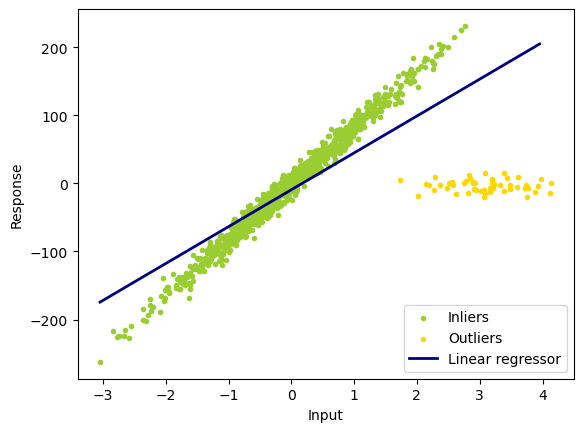

In [9]:
lw = 2
plt.scatter(
    X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
    X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regressor")
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

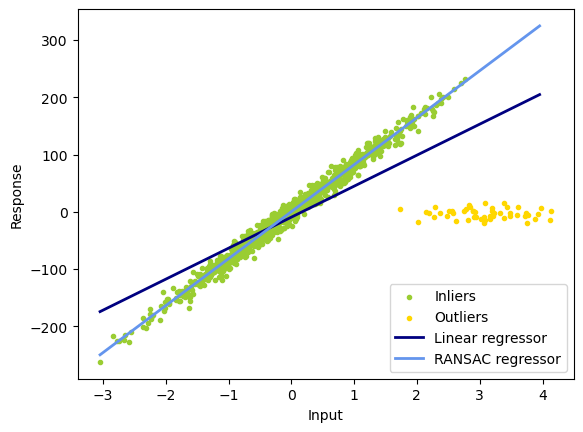

In [10]:
lw = 2
plt.scatter(
    X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
    X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regressor")
plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=lw,
    label="RANSAC regressor",
)
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

# 5°) Ressources

[1] [M.A. Fischler and R.C. Bolles. Random sample consensus: A paradigm for model
fitting with applications to image analysis and automated cartography. Communications of the ACM, 24(6):381–395, 1981.](https://dl.acm.org/doi/epdf/10.1145/358669.358692)

[2] [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html)